# LOADING THE DATAFRAMES

We will be using the kaggle API to download our Data from  https://www.kaggle.com/c/ds4-predictive-modeling-challenge

In [181]:
!pip install kaggle

In [196]:
!pwd
!kaggle competitions download -c ds4-predictive-modeling-challenge

/Users/l/Work/Lambda/2_Unit/2_Sprint
100%|██████████████████████████████████████| 3.81M/3.81M [00:01<00:00, 2.34MB/s]

100%|████████████████████████████████████████| 211k/211k [00:00<00:00, 1.76MB/s]

100%|████████████████████████████████████████| 948k/948k [00:00<00:00, 3.30MB/s]

  0%|                                                | 0.00/236k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 236k/236k [00:00<00:00, 4.56MB/s]


### Unzips downloaded csvs and puts into csvs directory:

In [199]:
%%bash
if ls *.zip
then
    for z in *.zip
    do
        unzip "$z"
        rm "$z"
    done
    for c in *.csv
    do
        chmod +rwx "$c"
    done
    if ! test -d csvs
    then
        mkdir csvs
    fi
    mv *.csv csvs/
fi

ls: *.zip: No such file or directory


In [201]:
!ls csvs/

sample_submission.csv test_features.csv     train_labels.csv
submissions           train_features.csv


In [321]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = None

In [204]:
train_features = pd.read_csv('./csvs/train_features.csv')
test_features = pd.read_csv('./csvs/test_features.csv')

train_labels = pd.read_csv('./csvs/train_labels.csv')

sample_submission = pd.read_csv('./csvs/sample_submission.csv')

# Data Exploration

In [258]:
def NaN_count(df):
    se = df.isna().sum().reset_index()
    se.columns = ['feature', 'total NaN']
    return se[se['total NaN'] > 0].set_index('feature')

In [259]:
NaN_count(train_features)

,total NaN
feature,
funder,3635
installer,3655
subvillage,371
public_meeting,3334
scheme_management,3877
scheme_name,28166
permit,3056


In [104]:
train_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [67]:
train_features.describe(include='number')

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


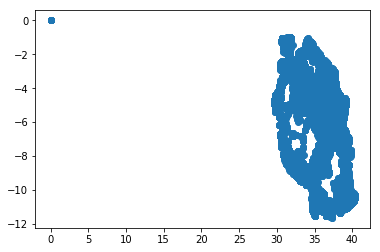

In [210]:
import matplotlib.pyplot as plt

plt.scatter(train_features['longitude'], train_features['latitude'])
## Conclusion: Those 0s are outside Tanzinia and really mean NaN

In [79]:
train_labels.head(1)
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

## CONCLUSIONS:
1) 0 is used as NaN inside of the latitude, longitude, and construction year. Potentially also in population and gps_height. Since average elevation of Tanzania is 1,018 m (3,340 ft), and populations usually arn't 0. We will assume they're all false 0, and real NaN.

2) Region_code and District code are categoricals incorrectly represented as numeric

3) There is a 54/38/7 split of our labels, so our baseline is to be over 54% accurate

## BASIC WRANGLING FUNCTION

The purpose of basic_wrangle is to fix conclusion 1

In [270]:
def basic_wrangle(df):
    df = df.copy()
    
    df['latitude'] = df['latitude'].replace(-2e-08, 0) #Spot check
    
    columns = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population'] #replace false 0s with NaN
    df = replace_0_with_NAN(df, columns)
    return (df)

### Basic Wrangle Testing

In [273]:
basic_wrangle_out = basic_wrangle(train_features)
NaN_count(basic_wrangle_out)

,total NaN
feature,
funder,3635
gps_height,20438
installer,3655
longitude,1812
latitude,1812
subvillage,371
population,21381
public_meeting,3334
scheme_management,3877


In [269]:
basic_wrangle_out[['construction_year', 'longitude', 'latitude', 'gps_height', 'population']].describe(include='number')

,construction_year,longitude,latitude,gps_height,population
count,38691.000000,57588.000000,57588.000000,38962.000000,38019.000000
mean,1996.814686,35.149669,-5.885572,1018.860839,281.087167
std,12.472045,2.607428,2.809876,612.566092,564.687660
min,1960.000000,29.607122,-11.649440,-90.000000,1.000000
25%,1987.000000,33.285100,-8.643841,393.000000,40.000000
50%,2000.000000,35.005943,-5.172704,1167.000000,150.000000
75%,2008.000000,37.233712,-3.372824,1498.000000,324.000000
max,2013.000000,40.345193,-0.998464,2770.000000,30500.000000


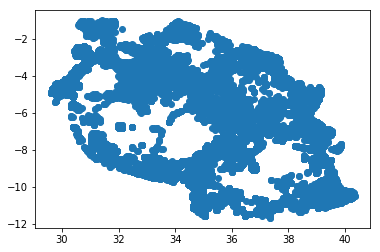

In [262]:
plt.scatter(basic_wrangle_out['longitude'], basic_wrangle_out['latitude'])

# Making our Testing Function

We will split our Validation set randomly instead of by time. Splitting by time is useful in time-series dataframes.

In [64]:
from sklearn.model_selection import train_test_split as tts

In [302]:
def test_model(pre_proccess, pipeline, features_df, labels_df, target, test_size, n_tests):
    results = []
    for _ in range(n_tests):
        x_train, x_val, y_train, y_val = tts(features_df,
                                     labels_df[target],
                                     train_size=1 - test_size,
                                     test_size=test_size,
                                     stratify=labels_df[target],
                                    )
         # stratify:
        #keeps the distribution of 'train_labels[target]'
        #equal between the training and validation sets
        #In general better than non-stratify testing
        x_train = pre_proccess(x_train)
        x_val = pre_proccess(x_val)
    
        pipeline.fit(x_train, y_train)
        results.append(pipeline.score(x_val, y_val))
    return results

# ATTEMPT 1

###### PRE PROCESS:

All Original Features used.

New Features:
    col_isMISSING - whether entry in col was an NaN which got filled.
    age - year inspected - construction year
    year - year inspected (int)

Other:
    Changed region_code, district_code to categorical variables.
    
###### PIPELINE:

Ordinal Encoding.

Random Forest Model

### Preproccessing Function

In [309]:
def pp_1(df):
    df = df.copy()
    
    #BASIC WRANGLING
    df = basic_wrangle(df)
    
    #FEATURE EXTRACTION
    targets = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    df = newFeature_isMISSING(df, targets)
    df['year'] = newFeature_year(df, 'date_recorded')
    
    #FILL NAN
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    df = replace_NAN_with_MEAN(df, numeric_cols)
    df = fill_catagoricalNANs(df)
    
    #CHANGE TO CATERGORICAL VARIABLES
    targets = ['region_code', 'district_code']
    df = numeric_to_categorical(df, targets)
    
    #MORE FEATURE EXTRACTION
    df['age'] = newFeature_age(df, 'construction_year', 'year')
    
    #SELECT FEATURES
    
    return df

### Testing Preprocessing

In [310]:
pp1_out = pp_1(train_features)
NaN_count(pp1_out)

,total NaN
feature,


In [311]:
pp1_out.describe(include='number')

,id,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,construction_year_IS_MISSING,longitude_IS_MISSING,latitude_IS_MISSING,gps_height_IS_MISSING,population_IS_MISSING,year,age
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,1018.860839,35.149669,-5.885572,0.474141,281.087167,1996.814686,0.348636,0.030505,0.030505,0.344074,0.359949,2011.921667,15.106981
std,21453.128371,2997.574558,496.110517,2.567349,2.766686,12.236230,451.765813,10.065781,0.476543,0.171974,0.171974,0.475069,0.479989,0.958758,10.096816
min,0.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,-7.000000
25%,18519.750000,0.000000,903.000000,33.354079,-8.540621,0.000000,100.000000,1996.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,8.000000
50%,37061.500000,0.000000,1018.860839,35.149669,-5.440285,0.000000,281.087167,1996.814686,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,14.185314
75%,55656.500000,20.000000,1319.250000,37.178387,-3.398151,0.000000,281.087167,2004.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,16.185314
max,74247.000000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,30500.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,53.000000


In [312]:
pp1_out.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1898,2146,37400,9,19288,21,27,20,125,2092,3,1,13,2697,3,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,11,1,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,MISSING,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,5300,12203,2503,307,51011,59400,36793,28166,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


### Pipeline Function

In [313]:
def pipe_1():
    pipeline = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    )
    return pipeline

### RESULTS:

In [ ]:
pre_proccess = pp_1
pipeline = pipe_1()
features_df = train_features
labels_df = train_labels
target = 'status_group'
test_size = .20
n_tests = 10

attempt_1 = test_model(pre_proccess, pipeline, features_df, labels_df, target, test_size, n_tests)

In [315]:
print(np.mean(attempt_1))

0.8105471380471381


# ATTEMPT 2

### Preproccessing Function

pp_1

### Pipeline Function

In [322]:
def pipe_2():
    pipeline = make_pipeline(
        ce.OrdinalEncoder(),
        StandardScaler(),
        RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    )
    return pipeline

### RESULTS:

In [ ]:
pre_proccess = pp_1
pipeline = pipe_2()
features_df = train_features
labels_df = train_labels
target = 'status_group'
test_size = .20
n_tests = 10

attempt_2 = test_model(pre_proccess, pipeline, features_df, labels_df, target, test_size, n_tests)

In [325]:
np.mean(attempt_2)

0.8123737373737374

# FUNCTIONS

#### Wrangling Functions

In [292]:
def replace_0_with_NAN(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col] = df[col].replace(0, np.nan)
    return df
def replace_NAN_with_MEAN(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col].fillna(df[col].mean())
    return df
def replace_NAN_with_Median(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col].fillna(df[col].median())
    return df
def replace_NAN_with_Mode(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col].fillna(df[col].mode())
    return df

def fill_catagoricalNANs(df):
    df = df.copy()
    categoricals = df.select_dtypes(exclude='number').columns
    for col in categoricals:
        df[col] = df[col].fillna('MISSING')
    return df
def numeric_to_categorical(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col].apply(str)
    return df

#### Feature Extraction Functions

In [295]:
def newFeature_age(df, birth, current):
    df = df.copy()
    return (df[current] - df[birth])
def newFeature_year(df, col):
    df = df.copy()
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
    return df[col].dt.year
def newFeature_isMISSING(df, cols):
    df = df.copy()
    for col in cols:
        df[col + '_IS_MISSING'] = df[col].isnull().astype(int)
    return df